# Working with Images in ApertureDB

**[Image](https://docs.aperturedata.io/category/image-commands) is an object recognized by ApertureDB and the query language allows you to directly add, find, update, and delete images.**

In [1]:
# Set up machine and login information to use in the rest of this notebook
from getpass import getpass

dbinstance = input("Machine name: ")
password = getpass("Password:")

Machine name:  demo.gcp.cloud.aperturedata.io
Password: ········


In [2]:
# Connector class offers a way to connect to an instance of ApertureDB
from aperturedb import Connector

db = Connector.Connector(dbinstance, user="admin", password=password)

In [3]:
# Simple query to see how the database is doing
# https://docs.aperturedata.io/query_language/Reference/db_commands/GetStatus
query = [{
    "GetStatus": {
    }
}]

# Execute the query to get back a JSON response for GetStatus 
response, blobs = db.query(query)

db.print_last_response()

[
    {
        "GetStatus": {
            "info": "OK",
            "status": 0,
            "system": "ApertureDB",
            "version": "0.17.20"
        }
    }
]


## Create or Add an Image of a Dish to ApertureDB
#### Let's say we want to add some pictures of food we prepared. One way to introduce new images in the database is through our query language

**For bulk additions, we recommend using the Python SDK loaders(CROSSLINK)**

In [4]:
query = [{
    "AddImage": {
        # Notice the missing "class" property since we already know its an Image (represented as _Image in ApertureDB)
        "properties": {
            "name": "Focaccia",
            "id": 35,
            "contributor": "Vishakha",
            "category": "starter",
            "cuisine": "Italian",
            "location": "Brittany",
            "caption": "fresh made focaccia with herbs from the garden"
        },
        "if_not_found": {                  # avoid adding twice
            "id": ["==", 35]
        }
    }
}]

# Read the image data as a binary blob
fd = open("data/focaccia_brittany.jpg", 'rb')
image_arr = [ fd.read() ]
fd.close()

response, blobs = db.query(query, image_arr)

db.print_last_response()

[
    {
        "AddImage": {
            "status": 0
        }
    }
]


## Find and view the image by querying its properties
#### Now verify this Image was added to the database and read all the property values

[
    {
        "FindImage": {
            "blobs_start": 0,
            "entities": [
                {
                    "_blob_index": 0,
                    "_uniqueid": "7.246621.221080",
                    "caption": "fresh made focaccia with herbs from the garden",
                    "category": "starter",
                    "contributor": "Vishakha",
                    "cuisine": "Italian",
                    "id": 35,
                    "location": "Brittany",
                    "name": "Focaccia"
                }
            ],
            "returned": 1,
            "status": 0
        }
    }
]


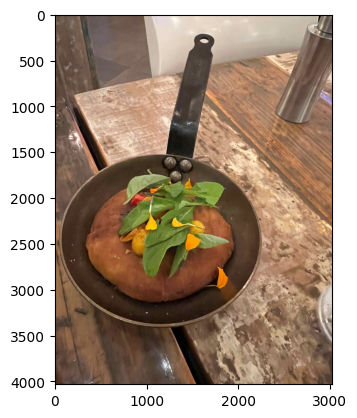

In [5]:
from aperturedb import NotebookHelpers as nh   # Our helper package for image displays and other utilities

query = [{
    "FindImage": {
        "constraints": {
            "name": ["==", "Focaccia"],
            "location": [">", "A"] 
        },
        "blobs": True,                          # This is set to False by default
        "results": {
            "all_properties": True
        }
    }
}]

response, blobs = db.query(query)

db.print_last_response()
nh.display(blobs)

## Update properties of the image already in ApertureDB
#### Use [UpdateImage](https://docs.aperturedata.io/query_language/Reference/image_commands/image_commands/UpdateImage) if any of the attributes need a new value or your application now needs a new attribute in existing images

In [6]:
query = [{
    "UpdateImage": {
        "properties": {
            "recipe_url": "https://www.allrecipes.com/recipe/23451/fantastic-focaccia-bread/"     # property will get added if missing or the value will be updated
        },
        "constraints": {
            "name": ["==", "Focaccia"]
        },
    }
}]

response, blobs = db.query(query)

db.print_last_response()

[
    {
        "UpdateImage": {
            "count": 1,
            "status": 0
        }
    }
]


In [7]:
query = [{
    "FindImage": {
        "constraints": {
            "name": ["==", "Focaccia"]
        },
        "results": {
            "all_properties": True
        }
    }
}]

response, blobs = db.query(query)

db.print_last_response()

[
    {
        "FindImage": {
            "entities": [
                {
                    "_uniqueid": "7.246621.221080",
                    "caption": "fresh made focaccia with herbs from the garden",
                    "category": "starter",
                    "contributor": "Vishakha",
                    "cuisine": "Italian",
                    "id": 35,
                    "location": "Brittany",
                    "name": "Focaccia",
                    "recipe_url": "https://www.allrecipes.com/recipe/23451/fantastic-focaccia-bread/"
                }
            ],
            "returned": 1,
            "status": 0
        }
    }
]


## Delete the image we no longer need

In [8]:
query = [{
    "DeleteImage": {
        "constraints": {
            "name": ["==", "Focaccia"]
        }
    }
}]

response, blobs = db.query(query)

db.print_last_response()

[
    {
        "DeleteImage": {
            "count": 1,
            "status": 0
        }
    }
]


### Verify deletion
#### We can verify that the image is not longer in the database.

In [9]:
query = [{
    "FindImage": {
        "constraints": {
            "name": ["==", "Focaccia"]
        },
        "results": {
            "all_properties": True
        }
    }
}]

response, blobs = db.query(query)

db.print_last_response()

[
    {
        "FindImage": {
            "returned": 0,
            "status": 0
        }
    }
]
